In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from pandas import Series, DataFrame
from sklearn import datasets, svm
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from patsy import dmatrices

In [2]:
# Read Data Set Using Pandas
# From Kaggle - https://www.kaggle.com/c/titanic/data (Train data set)
# What sorts of people were likely to survive. 
# Predict which passengers survived.
train_data = pd.read_csv("/Users/maggie/Documents/python/jupyter/data/titanic_train.csv")
test_data = pd.read_csv("/Users/maggie/Documents/python/jupyter/data/titanic_test.csv")

train_data
# test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Drom columns that have NaN values and will not be useful
train_data = train_data.drop(['Ticket','Cabin'], axis=1) 

# Also print the data to check. 
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [4]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [5]:
# And remove all the NaN values for other features :
# Better convert Nan age to mean (see above)
## train_data = train_data.dropna() 

## train_data

<function matplotlib.pyplot.show>

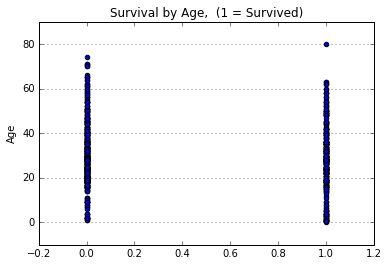

In [6]:
# Plot #2 Scatterplot Survival by age
plt.scatter(train_data.Survived, train_data.Age)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")
plt.show


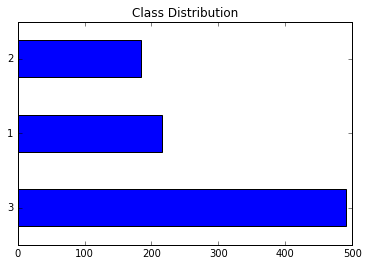

In [7]:
train_data.Pclass.value_counts().plot(kind="barh")
plt.title("Class Distribution")

<function matplotlib.pyplot.show>

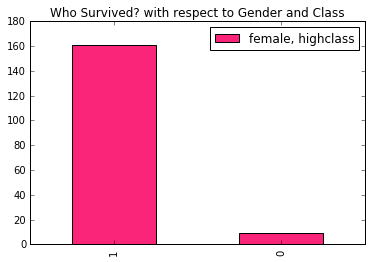

In [8]:
#Plot Femele high class
# 1 = Survived
female_highclass = train_data.Survived[train_data.Sex == 'female'][train_data.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479')
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show>

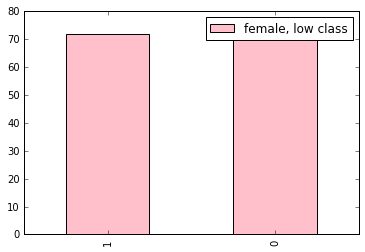

In [9]:
# Femele lowclass: 
# 1 = Survived

female_lowclass = train_data.Survived[train_data.Sex == 'female'][train_data.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink')

plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show>

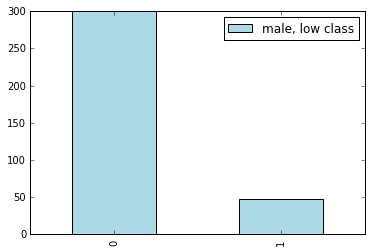

In [10]:
male_lowclass = train_data.Survived[train_data.Sex == 'male'][train_data.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue')
plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show>

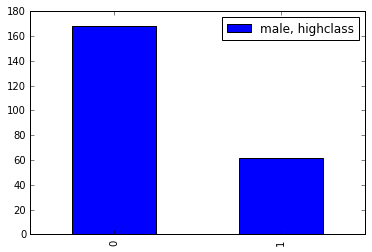

In [11]:
male_highclass = train_data.Survived[train_data.Sex == 'male'][train_data.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass')
plt.legend(loc='best')
plt.show

In [12]:
target = train_data["Survived"].values
target


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [13]:
# Change from string to numeric values 
train_data["Sex"][train_data["Sex"] == "male"] = 0
train_data["Sex"][train_data["Sex"] == "female"] = 1

train_data["Embarked"] = train_data["Embarked"].fillna("S")

train_data["Embarked"][train_data["Embarked"] == "S"] = 0
train_data["Embarked"][train_data["Embarked"] == "C"] = 1
train_data["Embarked"][train_data["Embarked"] == "Q"] = 2

train_data

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,1


In [18]:
treeClassifier_features = train_data[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
my_des_tree_model = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)

# Fit = my_tree_two.fit(X, y) Where X are the featurse and y is the target
my_des_tree_model = my_des_tree_model.fit(treeClassifier_features, target)
my_des_tree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [19]:
print "DecisionTreeClassifier"
print("Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked")
print(my_des_tree_model.feature_importances_)
importances = my_des_tree_model.feature_importances_
print

DecisionTreeClassifier
('Pclass', 'Age', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked')
[ 0.14130255  0.17906027  0.41616727  0.17938711  0.05039699  0.01923751
  0.0144483 ]



In [23]:
# Score the decision trees
print "Score for the DecisionTrees"
print(my_des_tree_model.score(treeClassifier_features, target))
print
# (prints 0.9057) = Thanks to fillng the na for age with the medians instead of dropping them

Score for the DecisionTrees
0.905723905724



In [24]:
forestClassifier_features = train_data[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
my_forest_model = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators=100, random_state = 1)
my_forest_model = my_forest_model.fit(forestClassifier_features, target)
my_forest_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [25]:
print "RandomForest Classifier"
print("Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked")
print(my_forest_model.feature_importances_)

RandomForest Classifier
('Pclass', 'Age', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked')
[ 0.10384741  0.20139027  0.31989322  0.24602858  0.05272693  0.04159232
  0.03452128]


Feature ranking:

('0 = Pclass', '1 = Age', '2 = Sex', '3 = Fare', '4 = SibSp', '5 = Parch', '6 = Embarked')
1. feature 2 (0.416167)
2. feature 3 (0.179387)
3. feature 1 (0.179060)
4. feature 0 (0.141303)
5. feature 4 (0.050397)
6. feature 5 (0.019238)
7. feature 6 (0.014448)

('0 = Pclass', '1 = Age', '2 = Sex', '3 = Fare', '4 = SibSp', '5 = Parch', '6 = Embarked')


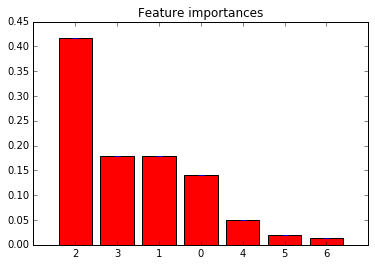

In [27]:
# Plot the feature importances For the Decision Tree Classifier
std = np.std([my_forest_model.feature_importances_ for tree in my_forest_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
print
print("0 = Pclass", "1 = Age", "2 = Sex", "3 = Fare", "4 = SibSp", "5 = Parch", "6 = Embarked")
for f in range(forestClassifier_features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(forestClassifier_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(forestClassifier_features.shape[1]), indices)
plt.xlim([-1, forestClassifier_features.shape[1]])
print
print("0 = Pclass", "1 = Age", "2 = Sex", "3 = Fare", "4 = SibSp", "5 = Parch", "6 = Embarked")
plt.show()


In [28]:

print "RandomForest Classifier"
print(my_forest_model.score(forestClassifier_features, target))
#(0.93) - Thanks to fillng the na for age with the medians instead of dropping them

RandomForest Classifier
0.939393939394


In [29]:
# SVM Approach: 
# Along the lines of :
#  http://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb
# Create an acceptable formula for our machine learning algorithms
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() shows that variables are categorical.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html   

formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

# (Featueres as :0 = Intercept, 1 = C(Pclass)[T.2], 2 = C(Pclass)[T.3], 3 = C(Sex)[T.1], 4 = C(Embarked)[T.1], 
#  5 = C(Embarked)[T.2], 6 = Age, 7 = SibSp, 8 = Parch)


In [30]:
svm_target,svm_features = dmatrices(formula_ml, data=train_data, return_type='dataframe')

print "Formula Features"
svm_features


Formula Features


,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.1],C(Embarked)[T.1],C(Embarked)[T.2],Age,SibSp,Parch
0,1.0,0.0,1.0,0.0,0.0,0.0,22.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,38.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,26.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,35.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,35.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,1.0,28.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0
8,1.0,0.0,1.0,1.0,0.0,0.0,27.0,0.0,2.0
9,1.0,1.0,0.0,1.0,1.0,0.0,14.0,1.0,0.0


In [31]:
print "Target:"
svm_target

Target:


,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
5,0.0
6,0.0
7,0.0
8,1.0
9,1.0


In [59]:

# (Featueres as :0 = Intercept, 1 = C(Pclass)[T.2], 2 = C(Pclass)[T.3], 3 = C(Sex)[T.1], 4 = C(Embarked)[T.1], 
#  5 = C(Embarked)[T.2], 6 = Age, 7 = SibSp, 8 = Parch)

 
# select which features we would like to analyze
# try chaning the selection here for diffrent output.
# Choose : [2,3] - pretty sweet DBs [3,1] --standard DBs [7,3] -very cool DBs,
# [3,6] -- very long complex dbs, could take over an hour to calculate! 
feature_1 = 7 #(2 = C(Pclass)[T.3])
feature_2 = 3 #(3 = C(Sex)[T.1])

X = np.asarray(svm_features)
X = X[:,[feature_1, feature_2]]  


y = np.asarray(svm_target)
# needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
y = y.flatten()      

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)

X_train = X[order]
y_train = y[order].astype(np.float)



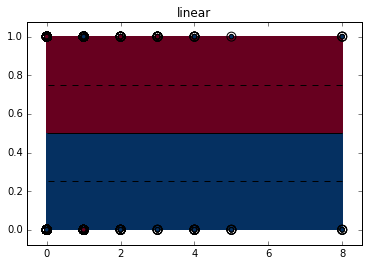

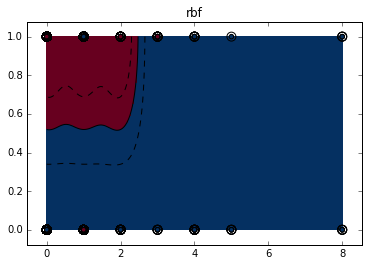

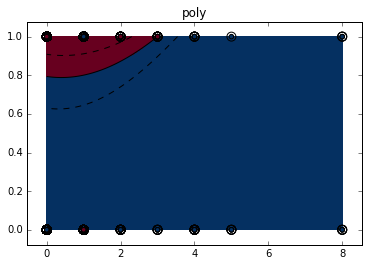

In [60]:

# set plotting parameters
plt.figure(figsize=(8,6))


# create a list of the types of kerneks we will use for your analysis
types_of_kernels = ['linear', 'rbf', 'poly']

# specify our color map for plotting the results
color_map = plt.cm.RdBu_r

# fit the model
for fig_num, kernel in enumerate(types_of_kernels):
    clf = svm.SVC(kernel=kernel, gamma=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=color_map)

    # circle out the test data
    plt.scatter(X_train[:, 0], X_train[:, 1], s=80, facecolors='none', zorder=10)
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=color_map)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
               levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()







In [63]:

# Change kernel here to poly, rbf or linear
# adjusting the gamma level also changes the degree to which the model is fitted

# (Featueres as :0 = Intercept, 1 = C(Pclass)[T.2], 2 = C(Pclass)[T.3], 3 = C(Sex)[T.1], 4 = C(Embarked)[T.1], 
#  5 = C(Embarked)[T.2], 6 = Age, 7 = SibSp, 8 = Parch)

 
# select which features we would like to analyze
# try chaning the selection here for diffrent output.
# Choose : [2,3] - pretty sweet DBs [3,1] --standard DBs [7,3] -very cool DBs,
# [3,6] -- very long complex dbs, could take over an hour to calculate! 


svm_model = svm.SVC(kernel='linear', gamma=3).fit(X_train, y_train) 
print svm_model

score = svm_model.score(X_train, y_train) 
print "Mean accuracy of SVC RBF kernel: {0}".format(score)

# (Featueres as :0 = Intercept, 1 = C(Pclass)[T.2], 2 = C(Pclass)[T.3], 3 = C(Sex)[T.1], 4 = C(Embarked)[T.1], 
#  5 = C(Embarked)[T.2], 6 = Age, 7 = SibSp, 8 = Parch)

# With Features 2 and 3 and SVC RBF kernel: score is : SVC RBF kernel: 0.786756453423

# With Features 2 and y  and poly kernel: score is : SVC RBF kernel: 0.796857463524



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=3, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean accuracy of SVC RBF kernel: 0.786756453423
